<h1 align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;应用系统体系架构 - 人工智能模块 </h1>

<h1 align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A4：循环神经网络 - 作业</h1>

### 关于这个Notebook

在这个Notebook中，大家参照上课的上课给出的案例，构建循环神经网络来对比特币数据集进行预测。

该数据集在文件BCHAIN-MKPRU中，该数据集来自于美国大学生数学建模竞赛2022年的Problem C: Trading Strategies。题目中对数据集的描述如下：

BCHAIN-MKPRU.csv
- Date: The date in mm-dd-yyyy (month-day-year) format.
- Value: The price in U.S. dollars of a single bitcoin on the indicated date.

### 构建循环神经网络(Recurrent Neural Nets)
<font color=red>作业要求：</font>

- <font color=red>你可以使用Keras来构建和训练自己的循环神经网络RNN和LSTM，并通过调整超参数使你的模型的能够准确预测比特币的价格。</font>
- <font color=red>你应该通过参数优化来提升你的模型的准确性，使其预测误差尽量小。</font>

## 1. 加载必要的包

In [1045]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## 2. 加载数据集

In [1046]:
data = pd.read_csv("BCHAIN-MKPRU.csv")
data.describe()

,Value
count,1826.000000
mean,12206.068281
std,14043.891627
min,594.080000
25%,3994.982500
50%,7924.460000
75%,11084.730000
max,63554.440000


## 3. 数据预处理

In [1047]:
'''
参照案例，对上述数据进行预处理，使其适合RNN模型进行训练，并对数据集进行切分，包含训练集和测试集
'''
# 定义函数来创建数据集，X为特征，y为目标值
def create_dataset(data, time_step=30):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step, 0])  # 过去 `time_step` 天的数据
        y.append(data[i + time_step, 0])    # 第`time_step`天的目标值
    return np.array(X), np.array(y)

# 使用MinMaxScaler对价格数据进行归一化
scaler = MinMaxScaler(feature_range=(0, 1)) # 将数据缩放到0-1之间
price_series = data[['Value']]
scaled_data = scaler.fit_transform(price_series)

# 使用 create_dataset 函数，假设使用过去60天的数据来预测未来1天的数据
time_step = 30
X, y = create_dataset(scaled_data, time_step)

# 将数据分为训练集和测试集，假设80%训练，20%测试
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 对 X 数据进行 reshape，转换为 (样本数, 时间步长, 特征数) 格式
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


## 4. 构建 RNN 模型进行预测

Model: "sequential_233"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_203 (SimpleRNN)   (None, 50)                2600      
_________________________________________________________________
dense_231 (Dense)            (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
45/45 [==============================] - 1s 21ms/step - loss: 0.0043
Epoch 2/10
45/45 [==============================] - 1s 20ms/step - loss: 5.2649e-04
Epoch 3/10
45/45 [==============================] - 1s 19ms/step - loss: 4.8707e-04
Epoch 4/10
45/45 [==============================] - 1s 20ms/step - loss: 4.4977e-04
Epoch 5/10
45/45 [==============================] - 1s 20ms/step - loss: 4.3767e-04
Epoch 6/10
45/45 [==============================] - 1s 23ms/step - loss: 3.7925e-04
Epoch 7/10
4

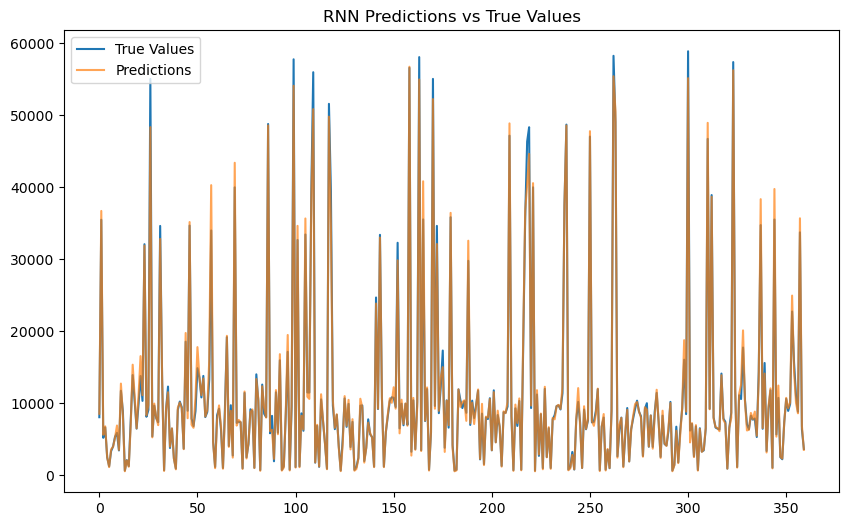

In [1048]:
'''
编写你自己的RNN模型
'''
# 构建RNN模型
model = Sequential()

# 添加 RNN 层
model.add(SimpleRNN(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1), activation='tanh'))

# 添加输出层 
model.add(Dense(units=1))

# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# 训练模型
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

'''
编译并训练你自己的RNN模型
'''
model.save("model.keras")

'''
评估你的模型
'''
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test_RNN = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test_RNN, label='True Values')
plt.plot(y_pred, label='Predictions', alpha=0.7)
plt.legend()
plt.title("RNN Predictions vs True Values")
plt.show()

## 5. 构建 LSTM 模型进行预测

Model: "sequential_234"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_31 (LSTM)               (None, 50)                10400     
_________________________________________________________________
dense_232 (Dense)            (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
45/45 [==============================] - 1s 12ms/step - loss: 0.0212 - val_loss: 0.0012
Epoch 2/10
45/45 [==============================] - 0s 6ms/step - loss: 0.0030 - val_loss: 7.8212e-04
Epoch 3/10
45/45 [==============================] - 0s 5ms/step - loss: 0.0025 - val_loss: 8.0248e-04
Epoch 4/10
45/45 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 8.1794e-04
Epoch 5/10
45/45 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 8.1231e-04
Epo

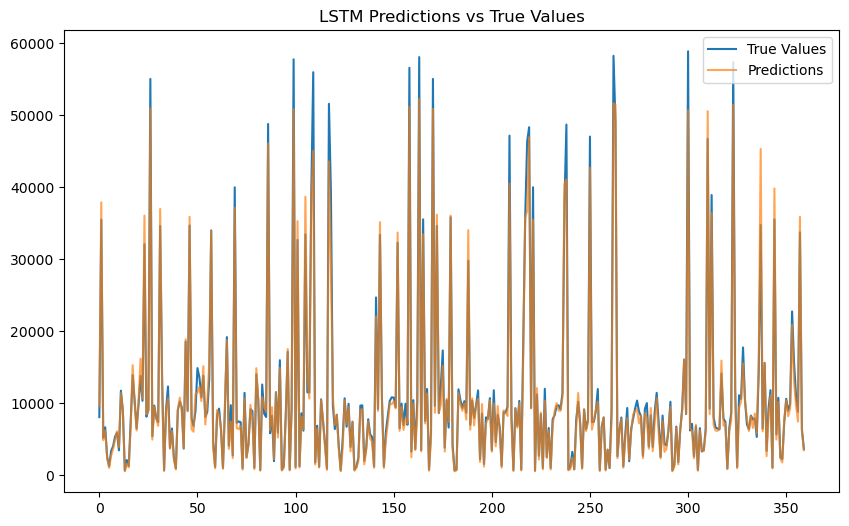

In [1049]:
from keras.layers import LSTM
'''
编写你自己的LSTM模型
'''
model = Sequential()

# 添加 LSTM 层
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1),dropout=0.2))

# 添加输出层
model.add(Dense(units=1))

# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

'''
编译并训练你自己的LSTM模型
'''
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
model.save("model.keras")

'''
评估你的模型
'''
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test_LSTM, label='True Values')
plt.plot(y_pred, label='Predictions', alpha=0.7)
plt.legend()
plt.title("LSTM Predictions vs True Values")
plt.show()